In [1]:
import pandas as pd
import numpy as np
Comments=pd.read_csv('Comments.csv')
Posts=pd.read_csv('Posts.csv')
Users=pd.read_csv('Users.csv')

Zadanie 1

array([[<AxesSubplot:title={'center':'Id'}>]], dtype=object)

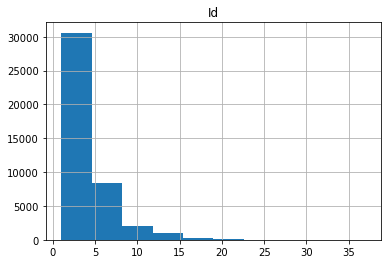

In [2]:
df=Comments.groupby('PostId')\
        .count()\
        .reset_index()
df[['Id']].hist()

Zadanie 2

In [4]:
Posts2=Posts[['OwnerUserId','ViewCount']]
df2=Posts2.groupby('OwnerUserId')\
            .sum()\
            .reset_index()
df3=df2.sort_values(by='ViewCount',ascending=False)
x=df3.values[0,0]
Users[Users['Id']==x][['DisplayName']]

,DisplayName
97,Mark Mayo


Zadanie 3

In [23]:
Posts3=Posts[['AcceptedAnswerId']]
data=Posts3.dropna(thresh=1)
data2=data.merge(Comments,left_on='AcceptedAnswerId',right_on='Id')
data2=data2.groupby('UserId')\
        .count()\
        .reset_index()
data2=data2[['UserId','Score']]
data2=data2.rename(columns={'Score': 'Count'})
data2=data2.sort_values(by='Count',ascending=False)
x1=data2.values[1,0]
Users[Users['Id']==x1][['DisplayName']]

,DisplayName
134,hippietrail


Zadanie 4

In [24]:
dane=Comments.groupby('PostId')\
        .max('Score')\
        .reset_index()
dane=dane[['PostId','Score']]
B=Posts.merge(Comments,left_on='AcceptedAnswerId',right_on='Id')
C=B[['PostId','Score_y']]\
        .rename(columns={'Score_y':'Score_sol'})
D=C.merge(dane,on='PostId')
series1 = D['Score'].squeeze()
series2=D['Score_sol'].squeeze()
d=sum(series1>series2)
l=len(series1)
(d/l)*100

55.1014848113336